In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
import shutil

def remove_folder(folder_path):
    try:
        shutil.rmtree(folder_path)
        print(f"Folder '{folder_path}' and its contents successfully removed.")
    except Exception as e:
        print(f"An error occurred while removing the folder: {e}")



In [3]:
# remove folders
folder_to_remove = "sample-notebooks"
remove_folder(folder_to_remove)

An error occurred while removing the folder: [Errno 2] No such file or directory: 'sample-notebooks'


In [4]:
#-------------------------------------------------------------------------------------------------------

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df0 = pd.read_csv('ADMISSIONS.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'ADMISSIONS.csv'

In [ ]:
df0.isnull().sum()

ROW_ID                      0
SUBJECT_ID                  0
HADM_ID                     0
ADMITTIME                   0
DISCHTIME                   0
DEATHTIME               53122
ADMISSION_TYPE              0
ADMISSION_LOCATION          0
DISCHARGE_LOCATION          0
INSURANCE                   0
LANGUAGE                25332
RELIGION                  458
MARITAL_STATUS          10128
ETHNICITY                   0
EDREGTIME               28099
EDOUTTIME               28099
DIAGNOSIS                  25
HOSPITAL_EXPIRE_FLAG        0
HAS_CHARTEVENTS_DATA        0
dtype: int64

In [ ]:
df0.loc[:,'DEATHTIME'].value_counts()

2139-10-06 12:00:00    2
2163-12-23 04:08:00    2
2104-02-16 12:00:00    2
2165-09-09 15:20:00    2
2157-02-27 05:18:00    2
                      ..
2131-04-27 12:00:00    1
2156-07-14 19:52:00    1
2185-04-05 13:55:00    1
2123-06-11 01:20:00    1
2151-03-06 09:10:00    1
Name: DEATHTIME, Length: 5834, dtype: int64

In [ ]:
df0.describe()

,ROW_ID,SUBJECT_ID,HADM_ID,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
count,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000
mean,29488.500000,33755.583288,149970.809584,0.099261,0.973006
std,17025.049075,28092.726225,28883.095213,0.299014,0.162067
min,1.000000,2.000000,100001.000000,0.000000,0.000000
25%,14744.750000,11993.750000,124952.750000,0.000000,1.000000
50%,29488.500000,24133.500000,149989.500000,0.000000,1.000000
75%,44232.250000,53851.500000,174966.500000,0.000000,1.000000
max,58976.000000,99999.000000,199999.000000,1.000000,1.000000


In [ ]:
#Convert ADMITTIME and DISCHTIME columns to datetime
df0['ADMITTIME'] = pd.to_datetime(df0['ADMITTIME'])
df0['DISCHTIME'] = pd.to_datetime(df0['DISCHTIME'])

#Filter rows with time difference within 30 days
within_30_days = df0[df0.apply(lambda row: (row['DISCHTIME'] - row['ADMITTIME']).days <= 30, axis=1)]
within_30_days

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58970,58593,98797,105447,2132-12-24 20:06:00,2132-12-25 12:00:00,2132-12-25 12:00:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2132-12-24 18:53:00,2132-12-24 21:41:00,ALTERED MENTAL STATUS,1,1
58971,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,2131-03-30 19:44:00,2131-03-30 22:41:00,TRAUMA,0,1
58972,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2151-03-05 17:23:00,2151-03-05 21:06:00,SAH,1,1
58973,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,RENAL CANCER/SDA,0,1


In [ ]:
within_30_days.head(0)

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA


In [ ]:
within_30_days.nunique()

ROW_ID                  56091
SUBJECT_ID              44636
HADM_ID                 56091
ADMITTIME               55778
DISCHTIME               55800
DEATHTIME                5472
ADMISSION_TYPE              4
ADMISSION_LOCATION          9
DISCHARGE_LOCATION         17
INSURANCE                   5
LANGUAGE                   74
RELIGION                   20
MARITAL_STATUS              7
ETHNICITY                  41
EDREGTIME               29757
EDOUTTIME               29751
DIAGNOSIS               15029
HOSPITAL_EXPIRE_FLAG        2
HAS_CHARTEVENTS_DATA        2
dtype: int64

In [ ]:
within_30_days.isna().sum()   #contagem dos NaN

ROW_ID                      0
SUBJECT_ID                  0
HADM_ID                     0
ADMITTIME                   0
DISCHTIME                   0
DEATHTIME               50600
ADMISSION_TYPE              0
ADMISSION_LOCATION          0
DISCHARGE_LOCATION          0
INSURANCE                   0
LANGUAGE                23699
RELIGION                  437
MARITAL_STATUS           9240
ETHNICITY                   0
EDREGTIME               26331
EDOUTTIME               26331
DIAGNOSIS                  25
HOSPITAL_EXPIRE_FLAG        0
HAS_CHARTEVENTS_DATA        0
dtype: int64

In [ ]:
#drop columns
columns_to_drop = ['LANGUAGE', 'MARITAL_STATUS','EDREGTIME','EDOUTTIME']
droped_30days_df = within_30_days.drop(columns=columns_to_drop)
droped_30days_df.isna().sum()

ROW_ID                      0
SUBJECT_ID                  0
HADM_ID                     0
ADMITTIME                   0
DISCHTIME                   0
DEATHTIME               50600
ADMISSION_TYPE              0
ADMISSION_LOCATION          0
DISCHARGE_LOCATION          0
INSURANCE                   0
RELIGION                  437
ETHNICITY                   0
DIAGNOSIS                  25
HOSPITAL_EXPIRE_FLAG        0
HAS_CHARTEVENTS_DATA        0
dtype: int64

In [ ]:
# Create a new binary column based of DEATHTIME; 1 - death; 0 - no death.
droped_30days_df['BINARY_DEATH'] = droped_30days_df['DEATHTIME'].replace('NaN', int(0))
droped_30days_df['BINARY_DEATH'] = droped_30days_df['DEATHTIME'].notna().astype(int)

In [ ]:
droped_30days_df['BINARY_DEATH'].value_counts()

0    50600
1     5491
Name: BINARY_DEATH, dtype: int64

In [ ]:
#drop columns DEATHTIME
columns_to_drop = ['DEATHTIME']
droped_30days_df0 = droped_30days_df.drop(columns=columns_to_drop)
droped_30days_df0.isna().sum()

ROW_ID                    0
SUBJECT_ID                0
HADM_ID                   0
ADMITTIME                 0
DISCHTIME                 0
ADMISSION_TYPE            0
ADMISSION_LOCATION        0
DISCHARGE_LOCATION        0
INSURANCE                 0
RELIGION                437
ETHNICITY                 0
DIAGNOSIS                25
HOSPITAL_EXPIRE_FLAG      0
HAS_CHARTEVENTS_DATA      0
BINARY_DEATH              0
dtype: int64

In [ ]:
droped_30days_df0['BINARY_DEATH'].value_counts()

0    50600
1     5491
Name: BINARY_DEATH, dtype: int64

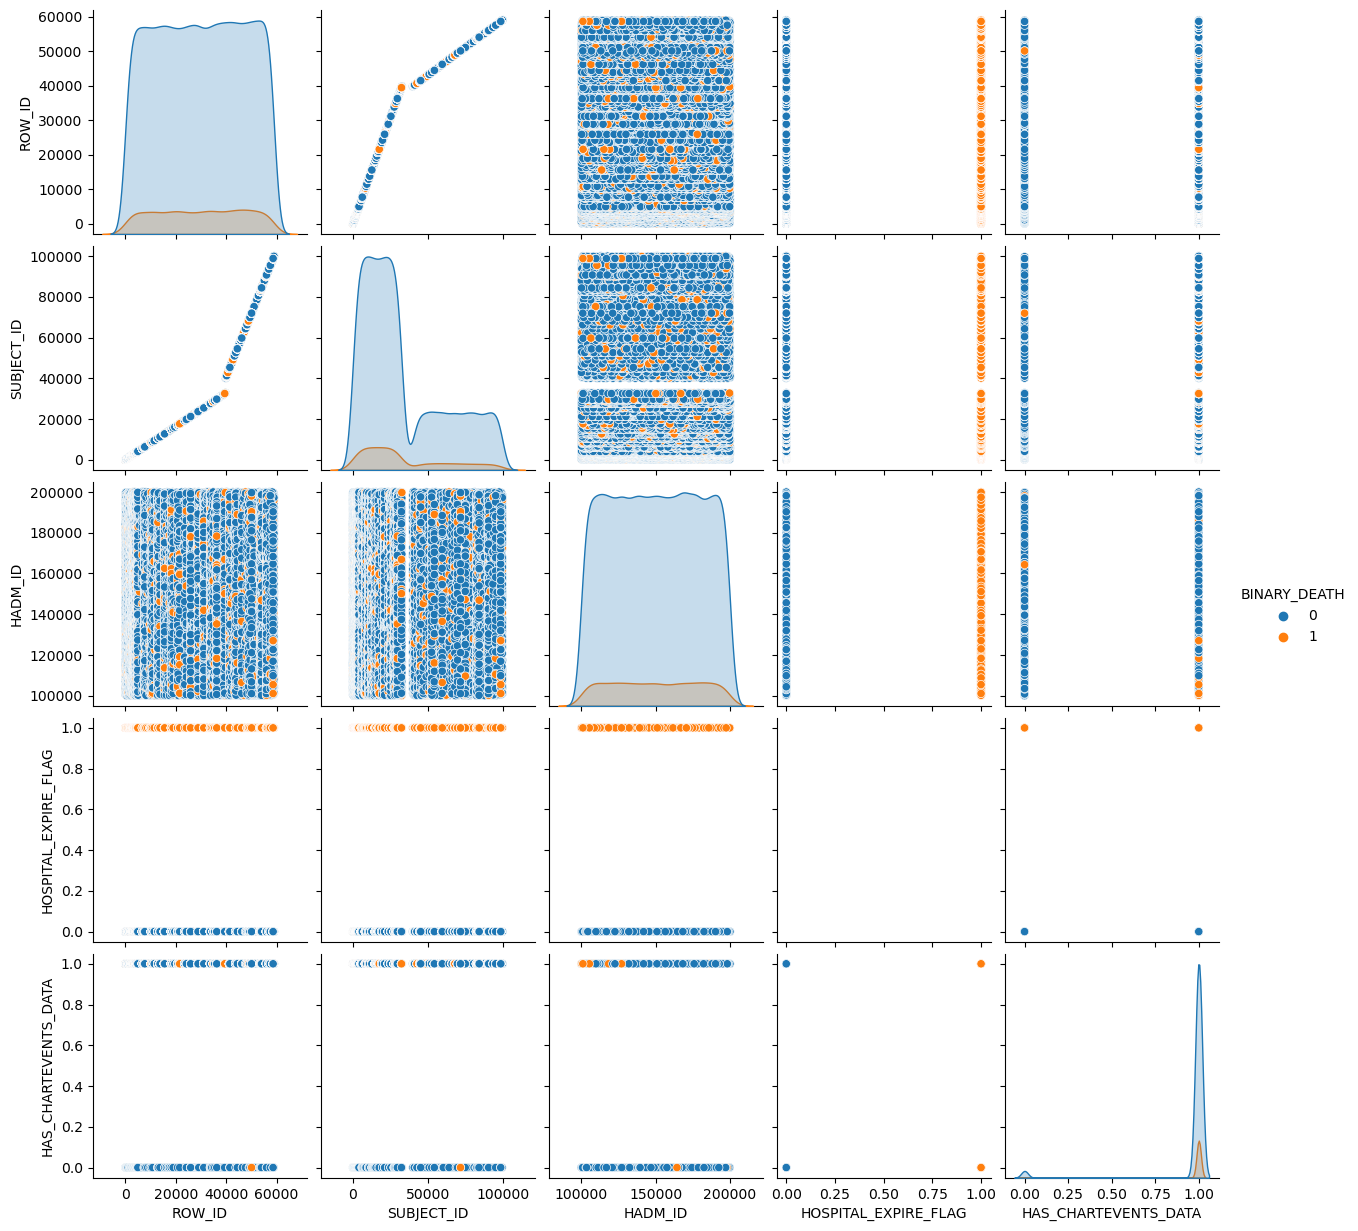

In [ ]:
sns.pairplot(droped_30days_df0, hue='BINARY_DEATH')

In [ ]:
droped_30days_df0

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,RELIGION,ETHNICITY,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,BINARY_DEATH
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,UNOBTAINABLE,WHITE,BENZODIAZEPINE OVERDOSE,0,1,0
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,CATHOLIC,WHITE,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1,0
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,CATHOLIC,WHITE,BRAIN MASS,0,1,0
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,PROTESTANT QUAKER,WHITE,INTERIOR MYOCARDIAL INFARCTION,0,1,0
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,UNOBTAINABLE,WHITE,ACUTE CORONARY SYNDROME,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58970,58593,98797,105447,2132-12-24 20:06:00,2132-12-25 12:00:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,CATHOLIC,WHITE,ALTERED MENTAL STATUS,1,1,1
58971,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,NOT SPECIFIED,WHITE,TRAUMA,0,1,0
58972,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,CATHOLIC,WHITE,SAH,1,1,1
58973,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,NOT SPECIFIED,WHITE,RENAL CANCER/SDA,0,1,0


In [ ]:
uppercase_names = droped_30days_df0['DIAGNOSIS'].str.upper()
cancer_frequency = uppercase_names.str.contains('CANCER').value_counts()
cancer_frequency

False    55414
True       652
Name: DIAGNOSIS, dtype: int64

In [ ]:
cancer_patient = (652/56066)
cancer_patient

0.011629151357328862

In [ ]:
most_frequent_diagnosis = droped_30days_df0['DIAGNOSIS'].value_counts().index[0]
most_frequent_diagnosis

'NEWBORN'

In [ ]:
secondmost_frequent_diagnosis = droped_30days_df0['DIAGNOSIS'].value_counts().index[1]
secondmost_frequent_diagnosis

'PNEUMONIA'

In [ ]:
thirdmost_frequent_diagnosis = droped_30days_df0['DIAGNOSIS'].value_counts().index[2]
thirdmost_frequent_diagnosis

'SEPSIS'

In [ ]:
fourmost_frequent_diagnosis = droped_30days_df0['DIAGNOSIS'].value_counts().index[3]
fourmost_frequent_diagnosis

'CONGESTIVE HEART FAILURE'

In [ ]:
diagnostics_of_interest = ['NEWBORN', 'PNEUMONIA', 'SEPSIS','CONGESTIVE HEART FAILURE'] 
filtered_df0 =  droped_30days_df0['DIAGNOSIS'].isin(diagnostics_of_interest)
filtered_df0.value_counts()

False    45526
True     10565
Name: DIAGNOSIS, dtype: int64

In [ ]:
NEWBORN_data = droped_30days_df0[droped_30days_df0['DIAGNOSIS'] == 'NEWBORN']['BINARY_DEATH']
NEWBORN_data

6        0
20       0
27       0
34       0
51       0
        ..
43859    0
43861    0
43879    0
43880    0
43881    0
Name: BINARY_DEATH, Length: 7039, dtype: int64

In [ ]:
PNEUMONIA_data = droped_30days_df0[droped_30days_df0['DIAGNOSIS'] == 'PNEUMONIA']['BINARY_DEATH']
PNEUMONIA_data

25       0
39       0
40       0
42       0
71       0
        ..
58836    0
58846    0
58858    0
58921    0
58933    0
Name: BINARY_DEATH, Length: 1511, dtype: int64

In [ ]:
SEPSIS_data = droped_30days_df0[droped_30days_df0['DIAGNOSIS'] == 'SEPSIS']['BINARY_DEATH']
SEPSIS_data

24       0
37       0
98       0
230      1
300      0
        ..
58852    0
58860    0
58890    0
58934    0
58951    0
Name: BINARY_DEATH, Length: 1121, dtype: int64

In [ ]:
HEARTFAILURE_data = droped_30days_df0[droped_30days_df0['DIAGNOSIS'] == 'CONGESTIVE HEART FAILURE']['BINARY_DEATH']
HEARTFAILURE_data

18       0
45       0
229      0
241      0
262      0
        ..
58443    0
58537    0
58629    0
58754    0
58801    0
Name: BINARY_DEATH, Length: 894, dtype: int64

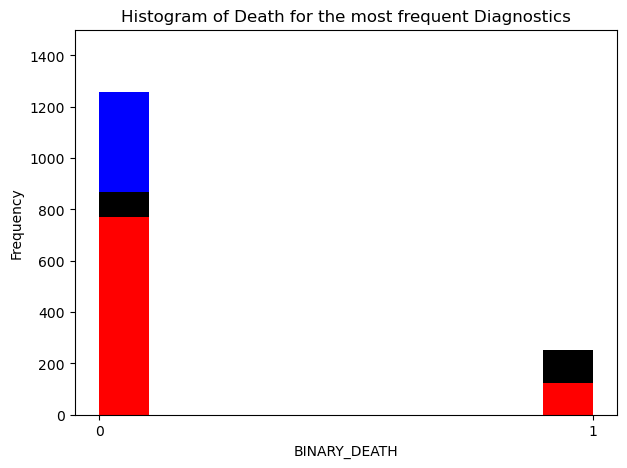

In [ ]:

# Plot the histogram
plt.figure(figsize=(7, 5))
plt.hist(NEWBORN_data, bins=10, color='white', alpha=1)
plt.hist(PNEUMONIA_data, bins=10, color='blue', alpha=1)
plt.hist(SEPSIS_data, bins=10, color='black', alpha=1)
plt.hist(HEARTFAILURE_data, bins=10, color='red', alpha=1)
plt.xticks([0, 1])
plt.ylim(0, 1500) 
plt.xlabel('BINARY_DEATH')
plt.ylabel('Frequency')
plt.title('Histogram of Death for the most frequent Diagnostics')
plt.show()

In [ ]:
heart_frequency = uppercase_names.str.contains('HEART').value_counts()
heart_frequency

False    53954
True      2112
Name: DIAGNOSIS, dtype: int64

In [ ]:
droped_30days_df1['DIAGNOSIS'] = droped_30days_df0['DIAGNOSIS'].fillna('UNKNOWN')
droped_30days_df1['DIAGNOSIS']

0                                  BENZODIAZEPINE OVERDOSE
1        CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...
2                                               BRAIN MASS
3                           INTERIOR MYOCARDIAL INFARCTION
4                                  ACUTE CORONARY SYNDROME
                               ...                        
58970                                ALTERED MENTAL STATUS
58971                                               TRAUMA
58972                                                  SAH
58973                                     RENAL CANCER/SDA
58975                              INTRACRANIAL HEMORRHAGE
Name: DIAGNOSIS, Length: 56091, dtype: object

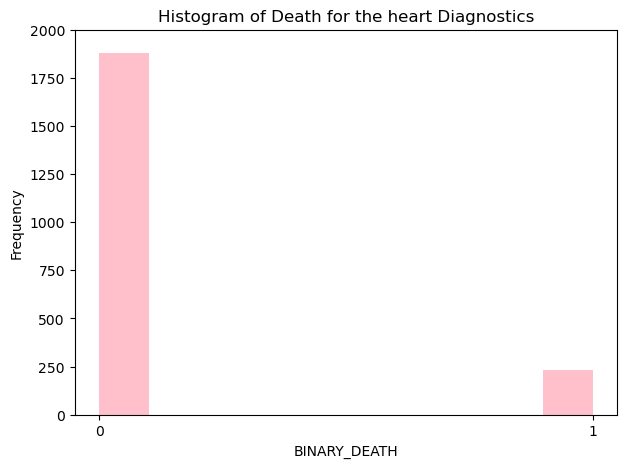

In [ ]:
heart_data = droped_30days_df1[droped_30days_df1['DIAGNOSIS'].str.contains('HEART')]['BINARY_DEATH']
# Plot the histogram
plt.figure(figsize=(7, 5))
plt.hist(heart_data, bins=10, color='pink', alpha=1)
plt.xticks([0, 1])
plt.ylim(0, 2000) 
plt.xlabel('BINARY_DEATH')
plt.ylabel('Frequency')
plt.title('Histogram of Death for the heart Diagnostics')
plt.show()